# Generation of capacity curves using DBELA
This feature of the risk Modellers Toolkit enables the generation of various models (capacity curves), as a way to propogate the building-to-building variability to the final fragility or vulnerability models. The figure below illustrates various capacity curves (in terms of spectral acceleration versus spectral displacement) generated using the Displacement-based Earthquake Loss Assessment (DBELA) approach.

<img src="../../../../figures/synthethic_capacity_curves.png" height="150" width="350" align="middle">


## Loading probabilistic distribution for geometric and material properties

Include a description here of what can be done using this feature. Include an image of the results (Vitor has this)

To use this feature click here.

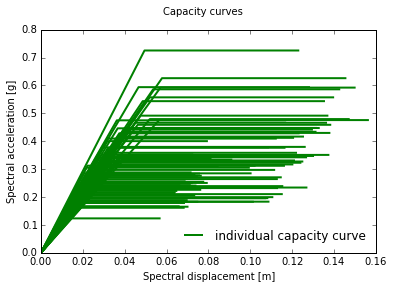

In [1]:
import DBELA
from rmtk.vulnerability.common import utils
%matplotlib inline 
no_assets = 100
building_model_file ='../../../../../rmtk_data/DBELA/bare_frames.csv'
damage_model = utils.read_damage_model('../../../../../rmtk_data/damage_model_dbela_low_code.csv')

building_class_model = DBELA.read_building_class_model(building_model_file)
assets = DBELA.generate_assets(building_class_model,no_assets)
capacity_curves = DBELA.generate_capacity_curves(assets,damage_model)

utils.plot_capacity_curves(capacity_curves)

## Adding additional information
This module can be used to generate many synthethic pushover curves (Base shear versus Roof displacement or Spectral acceleration versus Spectrum displacement), starting from a median pyshover curve and dispersion levels for a number of specific points on the curve. To use this feature click here.

In [2]:
gamma = 1.2
yielding_point_index = 1

capacity_curves = utils.add_information(capacity_curves,'gamma','value',gamma)
capacity_curves = utils.add_information(capacity_curves,'yielding point','point',yielding_point_index)

utils.save_SdSa_capacity_curves(capacity_curves,'../../../../../rmtk_data/capacity_curves_dbela.csv')